In [3]:
#%run "../../scripts/utility_readblt_fake.py" "fake3mu"

In [4]:
from utility_common import *
from utility_plotter import *
import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline

#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

In [5]:
pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/fake/fake3mu/"
#cuts = 'lepton3_iso <0.15 '
cuts = 'lepton3_iso >=-10 '# & lepton3_iso <0.15'
Data = LoadDataframe(pickledir + "data2016").query(cuts)
MCttv = LoadDataframe(pickledir + "mcttboson").query(cuts)
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
MCzw = LoadDataframe(pickledir + "mcwz3lnu").query(cuts)
MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)

In [10]:
pp = pd.read_csv("plotparametersfake.csv")
df_list = [ MCzw,MCt,MCtt, MCttv, MCdy, MCzz, Data]
label_list = ['Prompt','tW','ttbar','ttV','V+Jets', 'VV', 'data']
color_list = ["grey","#a32020",  "#eb8c00", "#49feec", "deepskyblue", "mediumpurple", "k"]

In [ ]:
folder = 'fakeeemu'
for index, row in pp.iterrows():
    v,a,b,step,xl = row["var"], row["lower"], row["upper"], row["step"], row["xlabel"]
      
    plotter = SelectionPlotter(v,a,b,step,df_list)

    plotter.settingPlot(xl,label_list,color_list,logscale=False,plotWithoutXsErr=True)
    plotter.makePlot("../../plot/{}/linear/".format(folder))
    plt.close()
    
    plotter.settingPlot(xl,label_list,color_list,logscale=True,plotWithoutXsErr=True)
    plotter.makePlot("../../plot/{}/log/".format(folder))
    plt.close()
    # print out process
    print("making plots: {0}/{1}".format(index,len(pp)))
    clear_output(wait=True)
    

print('finish all making plots')

making plots: 19/21


# Some quick checks

In [11]:
for thisdf in [MCzz, MCdy, MCt, MCtt, Data]:
    n = np.sum(thisdf.eventWeight)
    nerr = np.sum(thisdf.eventWeight**2)**0.5
    print('{:.2f},{:.2f}'.format(n,nerr))

405.96,2.08
27266.69,152.07
218.67,16.79
3575.82,26.09
35828.00,189.28


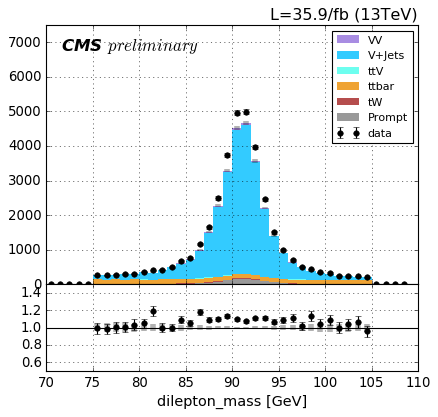

In [16]:
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))

v,a,b,step,xl = "dilepton_mass",70,110,1,"dilepton_mass [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list)
plotter.settingPlot(xl,label_list,color_list,logscale=False,plotWithoutXsErr=True)
plotter.makePlot()
plt.savefig("../../plot/dilepton_mass_2mu.png",dpi=200)

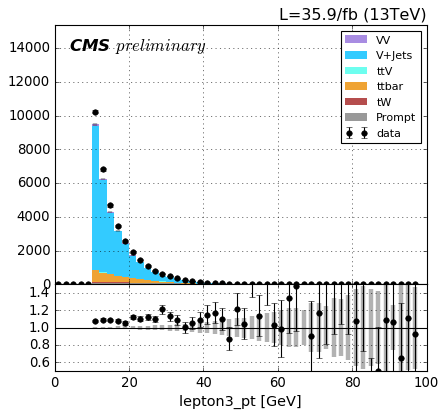

In [15]:
v,a,b,step,xl = "lepton3_pt",0,100,2,"lepton3_pt [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list)
plotter.settingPlot(xl,label_list,color_list)
plotter.makePlot()
plt.savefig("../../plot/",dpi=200)

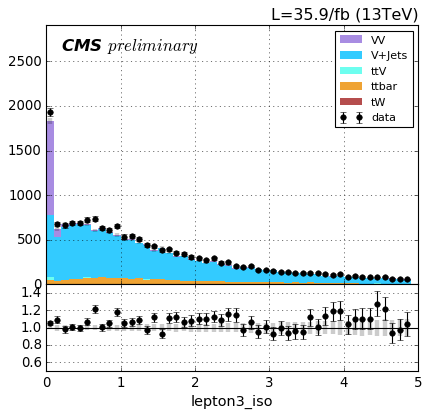

In [51]:
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))

v,a,b,step,xl = "lepton3_iso",0,5,0.1,"lepton3_iso"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[1,1,1,1,1])
plotter.settingPlot(xl,label_list,color_list,logscale=False)
plotter.makePlot()
plt.savefig("../../plot/nMuons_2mu.png",dpi=200)

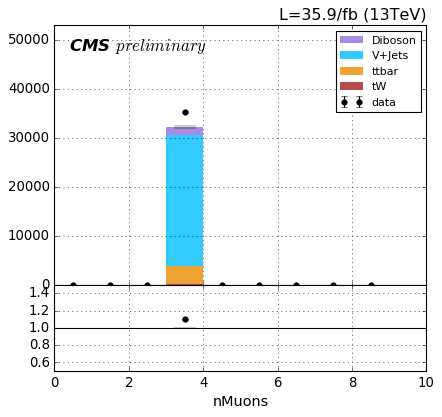

In [9]:
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))

v,a,b,step,xl = "nMuons",0,10,1,"nMuons"
plotter = SelectionPlotter(v,a,b,step,df_list)
plotter.settingPlot(xl,label_list,color_list,logscale=False)
plotter.makePlot()
plt.savefig("../../plot/nMuons_3mu.png",dpi=200)

In [39]:
MCdy.nPartons.mean()

0.0